In [2]:
import pandas as pd

def count_top_features(group):
    # Count the occurrences of each feature in the top 2 positions
    top_feature_counts = group.iloc[:, 5:7].apply(pd.Series.value_counts).sum(axis=1)
    return top_feature_counts

def aggregate_feature_importance(file_path):
    # Load the data
    df = pd.read_csv(file_path)
    
    df = df[~df['tod'].isin([0, 1, 2, 3, 23])]
    df = df[~df['marker'].isin(["train"])]

    
    # Group by the combination of (cityname, scale, tod, marker) and apply the function
    df_transformed = df.groupby(['cityname', 'scale', 'tod', 'marker']).apply(count_top_features).unstack().fillna(0)
    
    # Reset the index for further analyses
    df_transformed.reset_index(inplace=True)
    
    # Calculate Aggregate Feature Importance
    numeric_columns = df_transformed.select_dtypes(include=[float, int]).columns
    avg_importance = df_transformed[numeric_columns].sum()
    sorted_avg_importance = avg_importance.sort_values(ascending=False)
    
    return sorted_avg_importance


def aggregate_feature_importance_using_df(df): 
    df = df[~df['tod'].isin([0, 1, 2, 3, 23])]
    df = df[~df['marker'].isin(["train"])]

    
    # Group by the combination of (cityname, scale, tod, marker) and apply the function
    df_transformed = df.groupby(['cityname', 'scale', 'tod', 'marker']).\
                apply(count_top_features).unstack().fillna(0)
    
    # Reset the index for further analyses
    df_transformed.reset_index(inplace=True)
    
    # Calculate Aggregate Feature Importance
    numeric_columns = df_transformed.select_dtypes(include=[float, int]).columns
    avg_importance = df_transformed[numeric_columns].sum()
    sorted_avg_importance = avg_importance.sort_values(ascending=False)
    
    return sorted_avg_importance



# Call the function for both files
mean_results = aggregate_feature_importance("/Users/nishant/Downloads/results_50x50_rerun_Aug_23_all_tods_mean/feature_importance.csv")
max_results = aggregate_feature_importance("/Users/nishant/Downloads/results_50x50_rerun_Aug_23_all_tods_max/feature_importance.csv")

print ("=======================================================")

# Print the results
print("For mean: Recurrent Congestion \n", mean_results)

print ("=======================================================")
print("\nFor max: Non-Recurrent Congestion \n", max_results)


print ("=======================================================")

# Reset indices to get features as a column
mean_df = mean_results.reset_index().rename(columns={'index': 'feature', 0: 'mean_rank'})
max_df = max_results.reset_index().rename(columns={'index': 'feature', 0: 'max_rank'})

# Merge the two dataframes on the feature column
merged_df = mean_df.merge(max_df, on='feature')

# Calculate the difference in rankings
merged_df['mean_rank_order'] = merged_df['mean_rank'].rank(ascending=False).astype(int)
merged_df['max_rank_order'] = merged_df['max_rank'].rank(ascending=False).astype(int)
merged_df['rank_difference'] = merged_df['mean_rank_order'] - merged_df['max_rank_order']

# ... [previous code]

# Create a deep copy of the filtered DataFrame
significant_changes = merged_df[merged_df['rank_difference'].abs() > 3].copy()

# Format the output using .loc[] on the copied DataFrame
significant_changes.loc[:, 'Rank Change'] = significant_changes.apply(lambda row: f"{row['mean_rank_order']} -> {row['max_rank_order']}", axis=1)

# Display the results with desired column headers
print(significant_changes[['feature', 'Rank Change']].rename(columns={'feature': 'Feature', 'Rank Change': 'Recurrent Rank -> Non-Recurrent Rank'}))



df = pd.read_csv("/Users/nishant/Downloads/results_50x50_rerun_Aug_23_all_tods_mean/feature_importance.csv")
for cityname in df['cityname'].unique():
    
    df = pd.read_csv("/Users/nishant/Downloads/results_50x50_rerun_Aug_23_all_tods_mean/feature_importance.csv")
    df = df[df['cityname'].isin([cityname])]
    mean_results = aggregate_feature_importance_using_df(df)
    
    df = pd.read_csv("/Users/nishant/Downloads/results_50x50_rerun_Aug_23_all_tods_max/feature_importance.csv")
    df = df[df['cityname'].isin([cityname])]
    max_results = aggregate_feature_importance_using_df(df)

    print ("=======================================================")

    # Print the results
#     print("For mean: Recurrent Congestion \n", mean_results)

    print ("=======================================================")
#     print("\nFor max: Non-Recurrent Congestion \n", max_results)


#     print ("=======================================================")
    

    # Reset indices to get features as a column
    mean_df = mean_results.reset_index().rename(columns={'index': 'feature', 0: 'mean_rank'})
    max_df = max_results.reset_index().rename(columns={'index': 'feature', 0: 'max_rank'})

    # Merge the two dataframes on the feature column
    merged_df = mean_df.merge(max_df, on='feature')

    # Calculate the difference in rankings
    merged_df['mean_rank_order'] = merged_df['mean_rank'].rank(ascending=False).astype(int)
    merged_df['max_rank_order'] = merged_df['max_rank'].rank(ascending=False).astype(int)
    merged_df['rank_difference'] = merged_df['mean_rank_order'] - merged_df['max_rank_order']

    # ... [previous code]

    # Create a deep copy of the filtered DataFrame
    significant_changes = merged_df[merged_df['rank_difference'].abs() > 2].copy()

    if significant_changes.shape[0] == 0:
        print ("No major changes for city: ", cityname)
        continue

    print ("City: ", cityname)
        
    # Format the output using .loc[] on the copied DataFrame
    significant_changes.loc[:, 'Rank Change'] = significant_changes.apply(lambda row: f"{row['mean_rank_order']} -> {row['max_rank_order']}", axis=1)

    # Display the results with desired column headers
    print(significant_changes[['feature', 'Rank Change']].rename(columns={'feature': 'Feature', 'Rank Change': 'Recurrent Rank -> Non-Recurrent Rank'}))




For mean: Recurrent Congestion 
 scale                            9500.0
streets-per-node-counts-4        3648.0
tod                              2470.0
k-avg                            2104.0
streets-per-node-counts-3        1371.0
betweenness                      1282.0
street-length-avg                 757.0
mean-lanes                        669.0
streets-per-node-avg              399.0
streets-per-node-proportions2     312.0
streets-per-node-counts-2         231.0
streets-per-node-counts-1         152.0
m                                 143.0
circuity-avg                      139.0
intersection-count                122.0
n                                  63.0
self-loop-proportion                7.0
streets-per-node-counts-5           1.0
dtype: float64

For max: Non-Recurrent Congestion 
 scale                            9500.0
k-avg                            3001.0
streets-per-node-counts-4        2589.0
tod                              2470.0
betweenness                      18

In [5]:
from smartprint import smartprint as sprint
import numpy as np

sprint ((list(mean_results.index.tolist()))[:8])

print ("======================================")
sprint ((list(max_results.index.tolist()))[:8]) # 

common_items = list (set(((list(max_results.index.tolist()))[:8])).intersection (set(((list(mean_results.index.tolist()))[:8]))) - set(['scale', 'tod']))
print ("Common items: ", common_items)

list.sort(common_items)

List: (list(mean_results.index.tolist()))[:8]


[
    'scale',
    'mean-lanes',
    'tod',
    'streets-per-node-counts-3',
    'k-avg',
    'streets-per-node-counts-4',
    'm',
    'street-length-avg'
]

List: (list(max_results.index.tolist()))[:8]


[
    'scale',
    'k-avg',
    'intersection-count',
    'tod',
    'n',
    'streets-per-node-counts-3',
    'streets-per-node-counts-2',
    'betweenness'
]

Common items:  ['k-avg', 'streets-per-node-counts-3']


In [6]:
type (mean_results)

pandas.core.series.Series

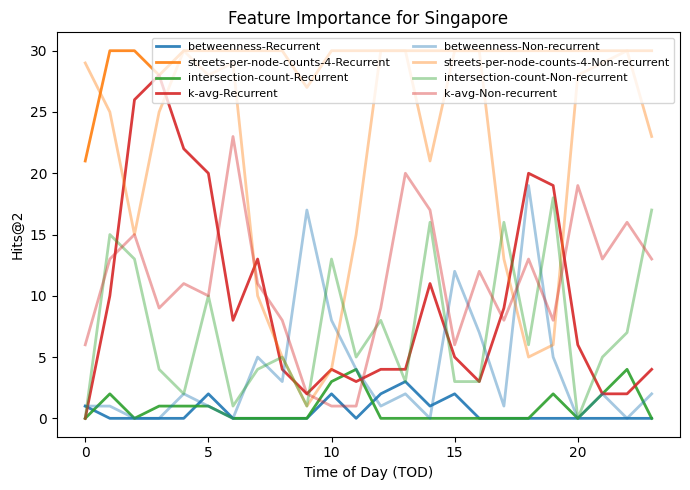

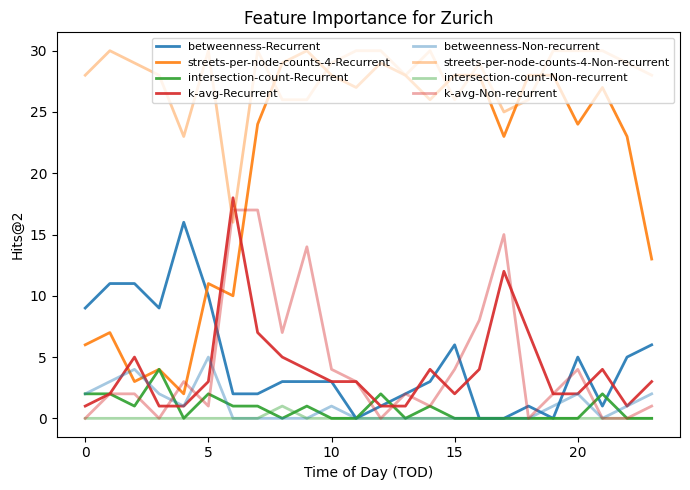

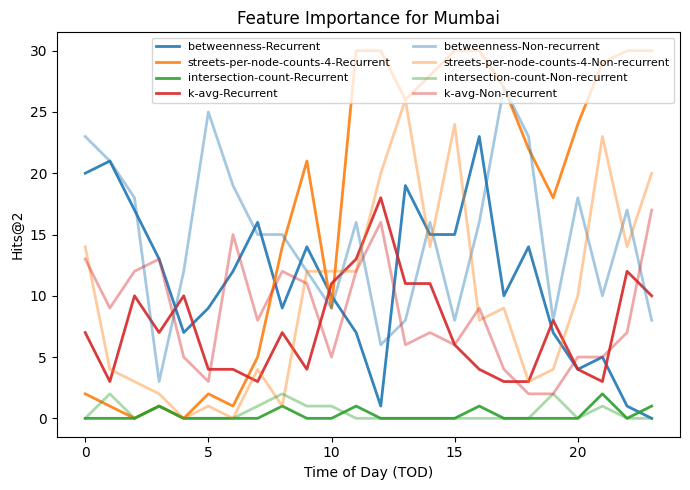

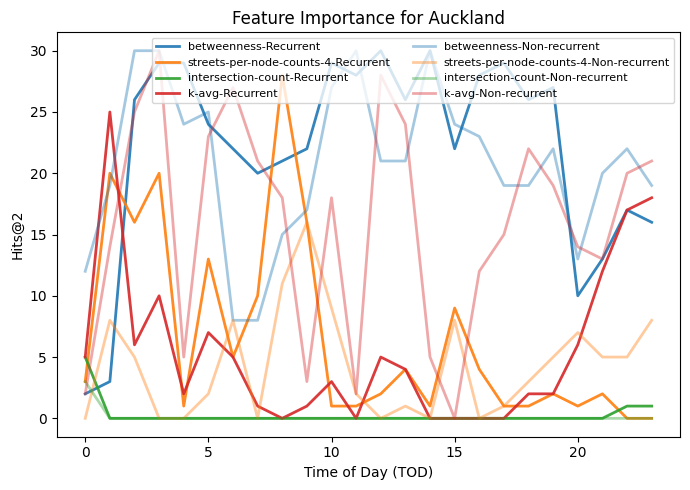

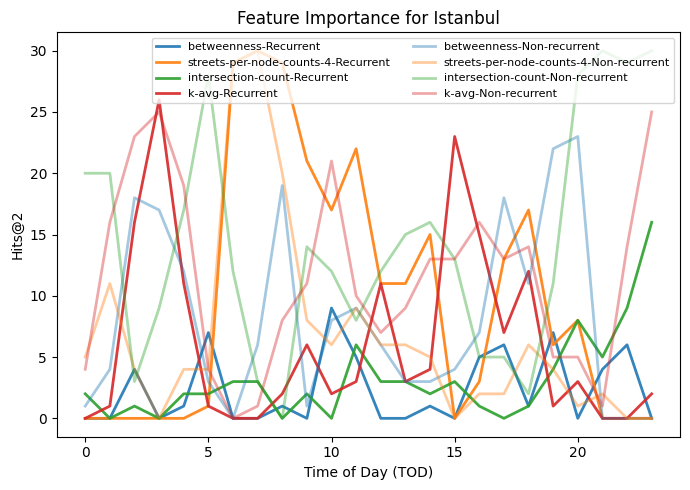

KeyError in  MexicoCity intersection-count


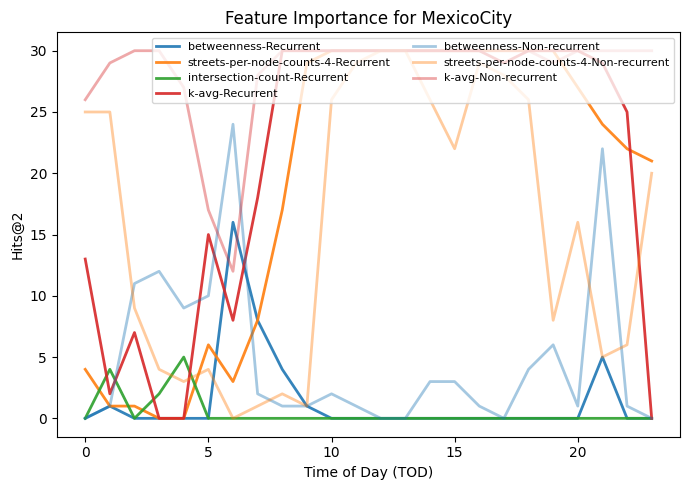

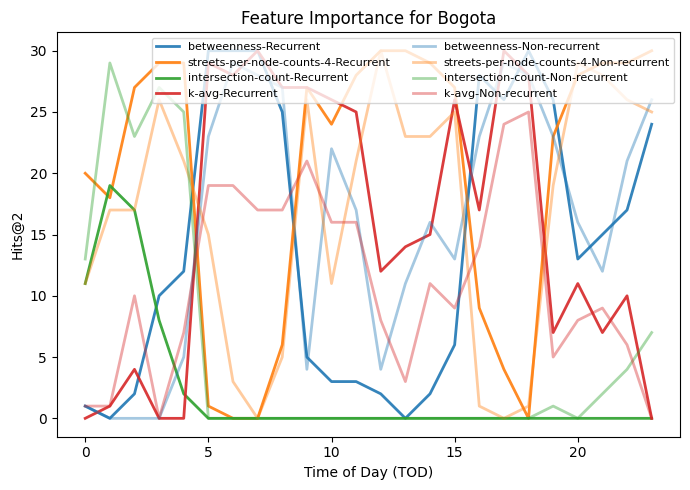

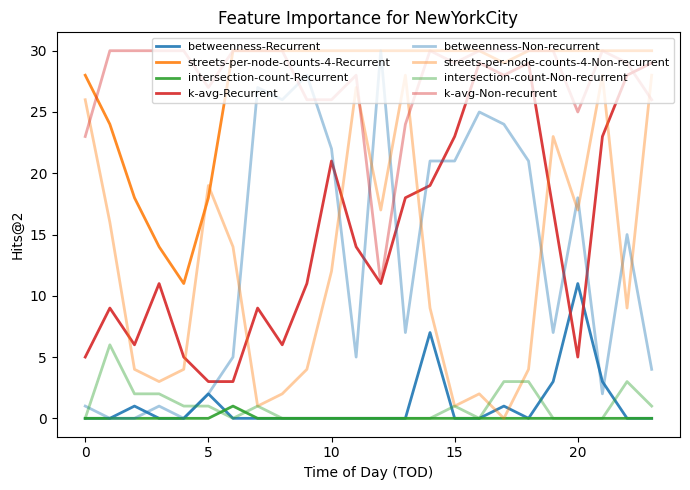

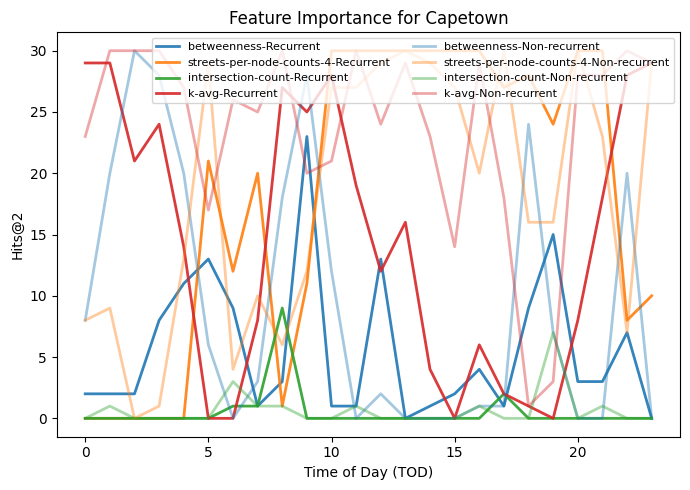

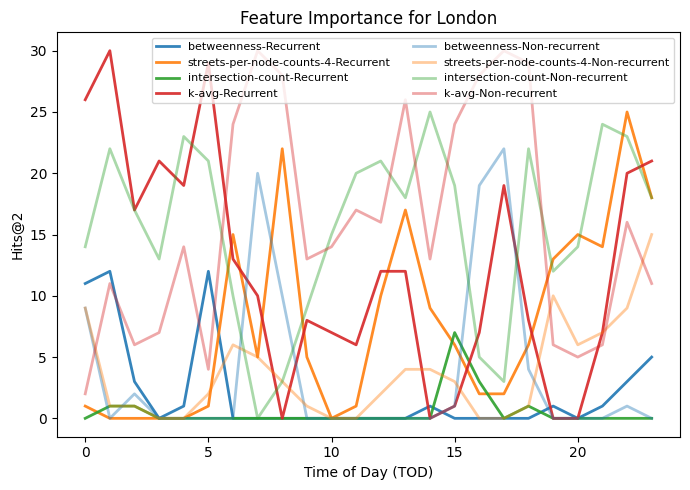

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def transform_to_hits_at_2(df):
    """Transform the dataframe to get hits@2 for feature importance."""
    # Count the occurrences of each feature in the top 2 positions
    top_feature_counts = df.groupby(['cityname', 'tod']).apply(lambda group: group.iloc[:, 5:7].apply(pd.Series.value_counts).sum(axis=1)).unstack().fillna(0)
    top_feature_counts.reset_index(inplace=True)
    return top_feature_counts

def plot_feature_importance_by_feature(df, filter_type, alpha=0.5):
    """
    Plot the feature importance for each feature across TOD.
    Different cities are represented by different colored lines.
    """
    transformed_df = transform_to_hits_at_2(df)
    
    features = transformed_df.columns[2:]  # Exclude 'cityname' and 'tod' columns
    city_colors = plt.cm.tab10.colors  # Get a list of colors for cities
    
#     sprint (city_colors, len(city_colors))
#     sprint (df['cityname'].unique())
    
    features = ['betweenness', 'streets-per-node-counts-4', 'intersection-count', 'k-avg']
    for idx_feature, feature in enumerate(features):

        
        for idx, city in enumerate(df['cityname'].unique()):
            city_data = transformed_df[transformed_df['cityname'] == city]

#             plt.plot(city_data['tod'], np.convolve(city_data[feature], [1/3] * 3, "same")
#                      , label=city + "-" + feature, color=city_colors[idx])

            try:
                plt.plot(city_data['tod'], np.convolve(city_data[feature], [1/1] * 1, "same")
                         , label=feature + "-" + filter_type, color=city_colors[idx_feature], 
                         alpha=alpha, linewidth=2)
            except KeyError:
                print ("KeyError in ", city, feature)
                continue
        


for city in [
    "Singapore",
    "Zurich",
    "Mumbai",
    "Auckland",
    "Istanbul",
    "MexicoCity",
    "Bogota",
    "NewYorkCity",
    "Capetown",
    "London"
]:




    plt.figure(figsize=(7, 5))

    # Plot feature importance for each feature
    
    df = pd.read_csv("/Users/nishant/Downloads/results_50x50_rerun_Aug_23_all_tods_mean/feature_importance.csv")    
    # df = df[~df['tod'].isin([0, 1, 2, 3, 23])]
    df = df[df['cityname'].isin([city])]
    df = df[~df['marker'].isin(["train"])]
    plot_feature_importance_by_feature(df, alpha=0.9, filter_type="Recurrent")

    
    df = pd.read_csv("/Users/nishant/Downloads/results_50x50_rerun_Aug_23_all_tods_max/feature_importance.csv")    
    # df = df[~df['tod'].isin([0, 1, 2, 3, 23])]
    df = df[df['cityname'].isin([city])]
    df = df[~df['marker'].isin(["train"])]
    plot_feature_importance_by_feature(df, alpha=0.4, filter_type="Non-recurrent")

    plt.title(f"Feature Importance for {city}")
    plt.xlabel("Time of Day (TOD)")
    plt.ylabel("Hits@2")
    # plt.ylim(3, 8)
    plt.legend(ncol=2, fontsize=8, loc="upper right")
    plt.tight_layout()
    plt.show()



In [5]:
df.head()

,cityname,scale,tod,marker,plot_counter,feature1,feature2,feature3,feature4,feature5,...,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16
5,London,50,0,val,4,intersection-count,streets-per-node-counts-2,streets-per-node-counts-3,m,streets-per-node-proportions2,...,streets-per-node-avg,k-avg,n,streets-per-node-counts-1,betweenness,circuity-avg,streets-per-node-counts-5,mean-lanes,self-loop-proportion,street-length-avg
47,London,50,0,val,5,streets-per-node-counts-2,betweenness,streets-per-node-counts-3,streets-per-node-proportions2,intersection-count,...,k-avg,streets-per-node-avg,n,streets-per-node-counts-4,circuity-avg,mean-lanes,streets-per-node-counts-5,self-loop-proportion,m,street-length-avg
88,London,50,0,val,6,streets-per-node-counts-2,k-avg,streets-per-node-proportions2,streets-per-node-avg,betweenness,...,streets-per-node-counts-4,n,streets-per-node-counts-3,m,circuity-avg,streets-per-node-counts-1,streets-per-node-counts-5,street-length-avg,self-loop-proportion,mean-lanes
131,London,50,0,val,7,streets-per-node-counts-4,betweenness,streets-per-node-proportions2,streets-per-node-avg,intersection-count,...,streets-per-node-counts-2,streets-per-node-counts-5,streets-per-node-counts-3,mean-lanes,circuity-avg,n,self-loop-proportion,streets-per-node-counts-1,m,street-length-avg
173,London,50,0,val,8,betweenness,streets-per-node-counts-3,intersection-count,streets-per-node-counts-2,streets-per-node-counts-4,...,k-avg,streets-per-node-avg,m,streets-per-node-proportions2,streets-per-node-counts-1,mean-lanes,streets-per-node-counts-5,street-length-avg,self-loop-proportion,circuity-avg


In [7]:
df = pd.read_csv("/Users/nishant/Downloads/results_50x50_rerun_Aug_23_all_tods_max/feature_importance.csv")    
df.groupby("cityname").count()["tod"]

cityname
Auckland       1435
Bogota         1427
Capetown       1426
Istanbul       1436
London         1431
MexicoCity     1432
Mumbai         1434
NewYorkCity    1432
Singapore      1440
Zurich         1437
Name: tod, dtype: int64

In [ ]:
# First we compute the values for each city and then check how many of those FI changed significantly when we shift from max to mean.
# 